In [1]:
import pandas as pd
import numpy as np
import sqlite3
import math
import datetime 
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from IPython.display import Image
from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 44em; }</style>"))

#ETL == extract => transform => load

In [2]:
conn = sqlite3.connect('datapatient_DW.db')

In [3]:
c = conn.cursor()
c
#untuk mengeksekusi query 

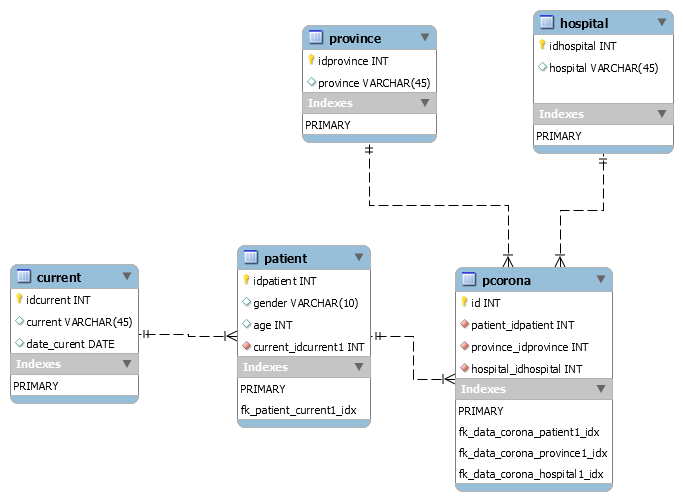

In [4]:
Image(filename='design db.png')

<H1>METODE SNOWFLAKE<H1>

In [6]:
c.executescript('drop table if exists patient')
c.executescript('drop table if exists province')
c.executescript('drop table if exists current')
c.executescript('drop table if exists hospital')
c.executescript('drop table if exists pcorona')
c.execute("CREATE TABLE IF NOT EXISTS 'current' ( 'idcurrent' INT, 'date_current' DATE NULL, 'current' VARCHAR(255) NULL, PRIMARY KEY ('idcurrent'))")
c.execute("CREATE TABLE IF NOT EXISTS 'patient' ('idpatient' INT, 'idcurrent' INT NOT NULL, 'age' int NULL, 'gender' VARCHAR(10), PRIMARY KEY ('idpatient'),FOREIGN KEY ('idcurrent') REFERENCES 'current' ('idcurrent') ON DELETE NO ACTION ON UPDATE NO ACTION)")
c.execute("CREATE TABLE IF NOT EXISTS 'province' ('idprovince' INT, 'provinsi' VARCHAR(45) NULL, PRIMARY KEY ('idprovince'))")
c.execute("CREATE TABLE IF NOT EXISTS 'hospital' ('idhospital' INT, 'hospital' VARCHAR(45) NULL, PRIMARY KEY ('idhospital'))")
c.execute("CREATE TABLE IF NOT EXISTS 'pcorona' ( 'id' INT, 'idpatient' INT NOT NULL , 'idprovince' INT NOT NULL, 'idhospital' INT NOT NULL, PRIMARY KEY ('id'), FOREIGN KEY ('idhospital') REFERENCES 'current' ('idcurrent') ON DELETE NO ACTION ON UPDATE NO ACTION, FOREIGN KEY ('idpatient') REFERENCES 'patient' ('idpatient') ON DELETE NO ACTION ON UPDATE NO ACTION, FOREIGN KEY ('idprovince') REFERENCES 'province' ('idprovince') ON DELETE NO ACTION ON UPDATE NO ACTION)")

In [7]:
data = pd.read_csv('patient_2.csv')
data

,id,gender,age,nationality,province,current_state,contacted_with,confirmed_date,released_date,deceased_date,hospital
0,1,female,31,indonesia,DKI Jakarta,released,NaN,02-03-2020,13-03-2020,NaN,RSPI Sulianti Saroso
1,2,female,64,indonesia,DKI Jakarta,released,1.0,02-03-2020,16-03-2020,NaN,RSPI Sulianti Saroso
2,3,female,33,indonesia,DKI Jakarta,released,1.0,06-03-2020,13-03-2020,NaN,RS persahabatan
3,4,female,34,indonesia,DKI Jakarta,isolated,1.0,06-03-2020,NaN,NaN,RSPI Sulianti Saroso
4,5,male,55,indonesia,DKI Jakarta,isolated,1.0,06-03-2020,NaN,NaN,RS sanglah
...,...,...,...,...,...,...,...,...,...,...,...
283,284,female,54,indonesia,DKI Jakarta,isolated,4.0,23-03-2020,NaN,NaN,RSPI Sulianti Saroso
284,285,male,31,indonesia,DKI Jakarta,isolated,1.0,23-03-2020,NaN,NaN,RSPI Sulianti Saroso
285,286,female,16,indonesia,DKI Jakarta,released,2.0,23-03-2020,23-03-2020,NaN,RSPI Sulianti Saroso
286,287,male,50,indonesia,DKI Jakarta,isolated,5.0,23-03-2020,23-03-2020,NaN,RSPI Sulianti Saroso


In [8]:
current = []
patient = []
hospital = []
province = []

for i,j in data.iterrows():
    if [j[0], j[7], j[5]] not in current:
        current.append([j[0], j[7], (j[5])])
        
    k = -1
    for index, value in enumerate(current):
        if value[0] == j[0]:
            k = index+1
            break
        
    if [k, j[1], j[2]] not in patient:
        patient.append([k, j[1], j[2]])
        
    if [j[4]] not in province:
        province.append(j[4])
        
    if [j[10]] not in hospital:
        hospital.append(j[10])


In [9]:
pcorona = []
for i,j in data.iterrows():   
    l = -1
    for index, value in enumerate(patient):
        if value[0] == j[0]:
            l = index+1
            break
    
    m = -1
    for index, value in enumerate(province):
        if value == (j[4]):
            m = index+1
            break
            
    n  = -1
    for index, value in enumerate(hospital):
        if value == (j[10]):
            n = index+1
            break
        
    if [l, m, n] not in pcorona:
        pcorona.append([l, m, n])


In [10]:
c.execute("DELETE FROM CURRENT")
for index, i in enumerate(current): 
    c.execute("INSERT INTO CURRENT VALUES(" + str(i[0]) + ", '" + str(i[1]) + "','" + str(i[2]) + "')")

c.execute("DELETE FROM PATIENT")
for index, i in enumerate(patient):
    c.execute("INSERT INTO PATIENT VALUES(" + str(index+1) + ", '" + str(i[0]) + "','" + str(i[1]) + "','" + str(i[2]) + "')")
    
c.execute("DELETE FROM HOSPITAL")
for index, i in enumerate(hospital): 
    c.execute("INSERT INTO HOSPITAL VALUES(" + str(index+1) + ", '" + str(i) + "')")
    
c.execute("DELETE FROM PROVINCE")
for index, i in enumerate(province): 
   c.execute("INSERT INTO PROVINCE VALUES(" + str(index+1) + ", '" + str(i) + "')")
    
c.execute("DELETE FROM PCORONA")
for index, i in enumerate(pcorona):
    idpatient = i[0]
    idprovince = i[0]
    idhospital = i[0]
    c.execute("INSERT INTO PCORONA VALUES(" + str(index+1) + ","  + str(idpatient) + "," + str(idprovince) + "," + str(idhospital) + ")")

conn.commit()

In [11]:
c.execute('''SELECT * FROM CURRENT''')
cekcurrent = []
for row in c.fetchall():
    cekcurrent.append(row)
cekcurrent

[(1, '02-03-2020', 'released'),
 (2, '02-03-2020', 'released'),
 (3, '06-03-2020', 'released'),
 (4, '06-03-2020', 'isolated'),
 (5, '06-03-2020', 'isolated'),
 (6, '08-03-2020', 'released'),
 (7, '09-03-2020', 'released'),
 (8, '09-03-2020', 'released'),
 (9, '09-03-2020', 'released'),
 (10, '09-03-2020', 'isolated'),
 (11, '09-03-2020', 'isolated'),
 (12, '09-03-2020', 'isolated'),
 (13, '09-03-2020', 'released'),
 (14, '09-03-2020', 'isolated'),
 (15, '09-03-2020', 'isolated'),
 (16, '09-03-2020', 'isolated'),
 (17, '09-03-2020', 'isolated'),
 (18, '09-03-2020', 'isolated'),
 (19, '09-03-2020', 'isolated'),
 (20, '10-03-2020', 'isolated'),
 (21, '10-03-2020', 'isolated'),
 (22, '10-03-2020', 'isolated'),
 (23, '10-03-2020', 'isolated'),
 (24, '10-03-2020', 'isolated'),
 (25, '10-03-2020', 'deceased'),
 (26, '10-03-2020', 'isolated'),
 (27, '10-03-2020', 'isolated'),
 (28, '11-03-2020', 'isolated'),
 (29, '11-03-2020', 'isolated'),
 (30, '11-03-2020', 'isolated'),
 (31, '11-03-2020',

In [12]:
c.execute('''SELECT * FROM PATIENT''')
cekpatient = []
for row in c.fetchall():
    cekpatient.append(row)
cekpatient

[(1, 1, 'female', '31'),
 (2, 2, 'female', '64'),
 (3, 3, 'female', '33'),
 (4, 4, 'female', '34'),
 (5, 5, 'male', '55'),
 (6, 6, 'male', '36'),
 (7, 7, 'female', '54'),
 (8, 8, 'male', '55'),
 (9, 9, 'female', '55'),
 (10, 10, 'male', '29'),
 (11, 11, 'female', '54'),
 (12, 12, 'male', '31'),
 (13, 13, 'female', '16'),
 (14, 14, 'male', '50'),
 (15, 15, 'female', '43'),
 (16, 16, 'female', '17'),
 (17, 17, 'male', '56'),
 (18, 18, 'male', '55'),
 (19, 19, 'male', '40'),
 (20, 20, 'female', '70'),
 (21, 21, 'female', '47'),
 (22, 22, 'female', '36'),
 (23, 23, 'female', '73'),
 (24, 24, 'male', '46'),
 (25, 25, 'female', '53'),
 (26, 26, 'male', '46'),
 (27, 27, 'male', '33'),
 (28, 28, 'male', '37'),
 (29, 29, 'male', '51'),
 (30, 30, 'male', '85'),
 (31, 31, 'female', '48'),
 (32, 32, 'male', '45'),
 (33, 33, 'male', '29'),
 (34, 34, 'male', '52'),
 (35, 35, 'female', '57'),
 (36, 36, 'female', '36'),
 (37, 37, 'male', '43'),
 (38, 38, 'female', '80'),
 (39, 39, 'male', '54'),
 (40,

In [13]:
c.execute('''SELECT * FROM HOSPITAL''')
cekhospital = []
for row in c.fetchall():
    cekhospital.append(row)
cekhospital

[(1, 'RSPI Sulianti Saroso'),
 (2, 'RSPI Sulianti Saroso'),
 (3, 'RS persahabatan'),
 (4, 'RSPI Sulianti Saroso'),
 (5, 'RS sanglah'),
 (6, 'RSPI Sulianti Saroso'),
 (7, 'RSPI Sulianti Saroso'),
 (8, 'RS dr. muwardi'),
 (9, 'RSPI Sulianti Saroso'),
 (10, 'RSPI Sulianti Saroso'),
 (11, 'RSPI Sulianti Saroso'),
 (12, 'RSPI Sulianti Saroso'),
 (13, 'RSPI Sulianti Saroso'),
 (14, 'RSPI Sulianti Saroso'),
 (15, 'RSPI Sulianti Saroso'),
 (16, 'RSPI Sulianti Saroso'),
 (17, 'RS persahabatan'),
 (18, 'RSPI Sulianti Saroso'),
 (19, 'RS sanglah'),
 (20, 'RSPI Sulianti Saroso'),
 (21, 'RSPI Sulianti Saroso'),
 (22, 'RS dr. muwardi'),
 (23, 'RSPI Sulianti Saroso'),
 (24, 'RSPI Sulianti Saroso'),
 (25, 'RS sanglah'),
 (26, 'RSPI Sulianti Saroso'),
 (27, 'RSPI Sulianti Saroso'),
 (28, 'RS dr. muwardi'),
 (29, 'RSPI Sulianti Saroso'),
 (30, 'RSPI Sulianti Saroso'),
 (31, 'RSPI Sulianti Saroso'),
 (32, 'RSPI Sulianti Saroso'),
 (33, 'RSPI Sulianti Saroso'),
 (34, 'RSPI Sulianti Saroso'),
 (35, 'RSPI S

In [14]:
c.execute('''SELECT * FROM PROVINCE''')
cekprovince = []
for row in c.fetchall():
    cekprovince.append(row)
cekprovince

[(1, 'DKI Jakarta'),
 (2, 'DKI Jakarta'),
 (3, 'DKI Jakarta'),
 (4, 'DKI Jakarta'),
 (5, 'DKI Jakarta'),
 (6, 'DKI Jakarta'),
 (7, 'DKI Jakarta'),
 (8, 'DKI Jakarta'),
 (9, 'DKI Jakarta'),
 (10, 'DKI Jakarta'),
 (11, 'DKI Jakarta'),
 (12, 'DKI Jakarta'),
 (13, 'DKI Jakarta'),
 (14, 'DKI Jakarta'),
 (15, 'Jawa Barat'),
 (16, 'Jawa Barat'),
 (17, 'DKI Jakarta'),
 (18, 'Banten'),
 (19, 'DKI Jakarta'),
 (20, 'DKI Jakarta'),
 (21, 'DKI Jakarta'),
 (22, 'DKI Jakarta'),
 (23, 'DKI Jakarta'),
 (24, 'DKI Jakarta'),
 (25, 'Bali'),
 (26, 'DKI Jakarta'),
 (27, 'DKI Jakarta'),
 (28, 'DKI Jakarta'),
 (29, 'DKI Jakarta'),
 (30, 'DKI Jakarta'),
 (31, 'DKI Jakarta'),
 (32, 'DKI Jakarta'),
 (33, 'Jawa Barat'),
 (34, 'DKI Jakarta'),
 (35, 'Banten'),
 (36, 'DKI Jakarta'),
 (37, 'DKI Jakarta'),
 (38, 'DKI Jakarta'),
 (39, 'DKI Jakarta'),
 (40, 'DKI Jakarta'),
 (41, 'Jawa Barat'),
 (42, 'DKI Jakarta'),
 (43, 'DKI Jakarta'),
 (44, 'Jawa Barat'),
 (45, 'DKI Jakarta'),
 (46, 'DKI Jakarta'),
 (47, 'DKI Jakarta'

In [15]:
c.execute('''SELECT * FROM PCORONA''')
cekpcorona = []
for row in c.fetchall():
    cekpcorona.append(row)
cekpcorona

[(1, 1, 1, 1),
 (2, 2, 2, 2),
 (3, 3, 3, 3),
 (4, 4, 4, 4),
 (5, 5, 5, 5),
 (6, 6, 6, 6),
 (7, 7, 7, 7),
 (8, 8, 8, 8),
 (9, 9, 9, 9),
 (10, 10, 10, 10),
 (11, 11, 11, 11),
 (12, 12, 12, 12),
 (13, 13, 13, 13),
 (14, 14, 14, 14),
 (15, 15, 15, 15),
 (16, 16, 16, 16),
 (17, 17, 17, 17),
 (18, 18, 18, 18),
 (19, 19, 19, 19),
 (20, 20, 20, 20),
 (21, 21, 21, 21),
 (22, 22, 22, 22),
 (23, 23, 23, 23),
 (24, 24, 24, 24),
 (25, 25, 25, 25),
 (26, 26, 26, 26),
 (27, 27, 27, 27),
 (28, 28, 28, 28),
 (29, 29, 29, 29),
 (30, 30, 30, 30),
 (31, 31, 31, 31),
 (32, 32, 32, 32),
 (33, 33, 33, 33),
 (34, 34, 34, 34),
 (35, 35, 35, 35),
 (36, 36, 36, 36),
 (37, 37, 37, 37),
 (38, 38, 38, 38),
 (39, 39, 39, 39),
 (40, 40, 40, 40),
 (41, 41, 41, 41),
 (42, 42, 42, 42),
 (43, 43, 43, 43),
 (44, 44, 44, 44),
 (45, 45, 45, 45),
 (46, 46, 46, 46),
 (47, 47, 47, 47),
 (48, 48, 48, 48),
 (49, 49, 49, 49),
 (50, 50, 50, 50),
 (51, 51, 51, 51),
 (52, 52, 52, 52),
 (53, 53, 53, 53),
 (54, 54, 54, 54),
 (55, 55, 

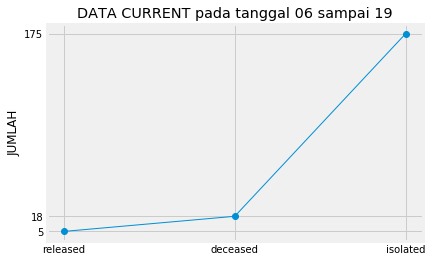

,current,jumlah
1,released,5
2,deceased,18
3,isolated,175


In [16]:

#VISUALISASI DATA KOTA DAN JUMLAH PEMBELIAN PADA SETIAP TAHUN

current = 'current'
c.execute('''SELECT current, count(idcurrent) as jumlah from current where date_current between "06/03/2020" and "19/03/2020"
             group by current order by jumlah ASC
          ''')

datacurrent = []
for row in c.fetchall():
    datacurrent.append(row)

datacurrent
np_datacurrent = np.array(datacurrent)
plt.plot([ str(x[0]) for x in np_datacurrent[:,:]], [ int(x[1]) for x in np_datacurrent[:,:]],'-o',linewidth=1.0)
# plt.xticks([ int(x[0]) for x in np_tahun_kota[:,:]], [ int(x[0]) for x in np_tahun_kota[:,:]])
plt.yticks([ int(x[1]) for x in np_datacurrent[:,:]], [ int(x[1]) for x in np_datacurrent[:,:]])
# plt.xlabel('JUMLAH')
plt.ylabel('JUMLAH')
plt.title("DATA " + current.upper()+ " pada tanggal 06 sampai 19")
plt.show()

df = pd.DataFrame([ x for x in np_datacurrent[:,:]])
df.columns = ['current','jumlah']
df.index = np.arange(1,len(df)+1)
df

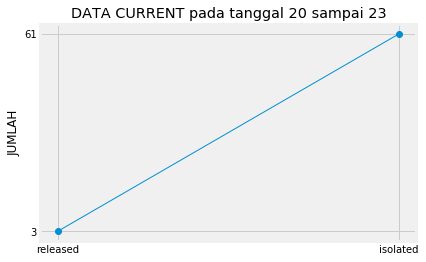

,current,jumlah
1,released,3
2,isolated,61


In [17]:

#VISUALISASI DATA KOTA DAN JUMLAH PEMBELIAN PADA SETIAP TAHUN

current = 'current'
c.execute('''SELECT current, count(idcurrent) as jumlah from current where date_current between "20/03/2020" and "23/03/2020"
             group by current order by jumlah ASC
          ''')

datacurrent = []
for row in c.fetchall():
    datacurrent.append(row)

datacurrent
np_datacurrent = np.array(datacurrent)
plt.plot([ str(x[0]) for x in np_datacurrent[:,:]], [ int(x[1]) for x in np_datacurrent[:,:]],'-o',linewidth=1.0)
# plt.xticks([ int(x[0]) for x in np_tahun_kota[:,:]], [ int(x[0]) for x in np_tahun_kota[:,:]])
plt.yticks([ int(x[1]) for x in np_datacurrent[:,:]], [ int(x[1]) for x in np_datacurrent[:,:]])
# plt.xlabel('JUMLAH')
plt.ylabel('JUMLAH')
plt.title("DATA " + current.upper() + " pada tanggal 20 sampai 23")
plt.show()

df = pd.DataFrame([ x for x in np_datacurrent[:,:]])
df.columns = ['current','jumlah']
df.index = np.arange(1,len(df)+1)
df

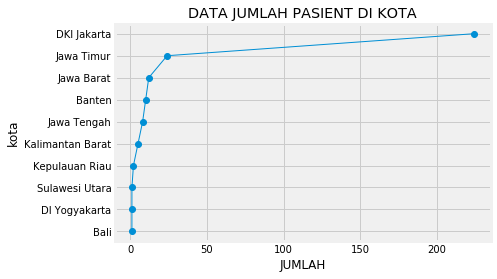

,jumlah,kota
1,1,Bali
2,1,DI Yogyakarta
3,1,Sulawesi Utara
4,2,Kepulauan Riau
5,5,Kalimantan Barat
6,8,Jawa Tengah
7,10,Banten
8,12,Jawa Barat
9,24,Jawa Timur
10,224,DKI Jakarta


In [25]:
data = 'kota'
c.execute('''select count(patient.idpatient) as jumlah, province.provinsi
             from patient join pcorona on patient.idpatient = 
             pcorona.idpatient join province on province.idprovince = 
             pcorona.idprovince group by province.provinsi order by jumlah ASC
          ''')
datakota = []
for row in c.fetchall():
    datakota.append(row)

datakota
np_datakota = np.array(datakota)
plt.plot([ int(x[0]) for x in np_datakota[:,:]], [ str(x[1]) for x in np_datakota[:,:]],'-o',linewidth=1.0)
# plt.xticks([ int(x[0]) for x in np_tahun_kota[:,:]], [ int(x[0]) for x in np_tahun_kota[:,:]])
plt.yticks([ str(x[1]) for x in np_datakota[:,:]], [ str(x[1]) for x in np_datakota[:,:]])
plt.xlabel('JUMLAH')
plt.ylabel('kota')
plt.title("DATA JUMLAH PASIENT DI " + data.upper())
plt.show()

df = pd.DataFrame([ x for x in np_datakota[:,:]])
df.columns = ['jumlah', 'kota']
df.index = np.arange(1,len(df)+1)
df

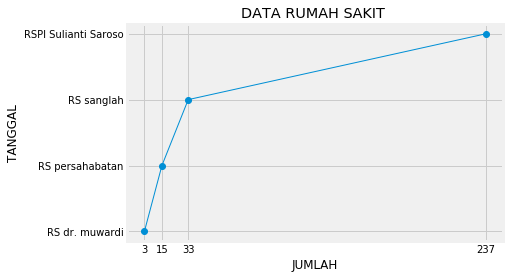

,jumlah,kota
1,3,RS dr. muwardi
2,15,RS persahabatan
3,33,RS sanglah
4,237,RSPI Sulianti Saroso


In [35]:
data = 'kota'
c.execute('''select count(patient.idpatient) as jumlah, hospital.hospital
             from patient join pcorona on patient.idpatient = 
             pcorona.idpatient join hospital on hospital.idhospital = 
             pcorona.idhospital group by hospital.hospital order by jumlah ASC
          ''')
datakota = []
for row in c.fetchall():
    datakota.append(row)

datakota
np_datakota = np.array(datakota)
plt.plot([ int(x[0]) for x in np_datakota[:,:]], [ str(x[1]) for x in np_datakota[:,:]],'-o',linewidth=1.0)
plt.xticks([ int(x[0]) for x in np_datakota[:,:]], [ int(x[0]) for x in np_datakota[:,:]])
plt.yticks([ str(x[1]) for x in np_datakota[:,:]], [ str(x[1]) for x in np_datakota[:,:]])
plt.xlabel('JUMLAH')
plt.ylabel('TANGGAL')
plt.title("DATA RUMAH SAKIT ")
plt.show()

df = pd.DataFrame([ x for x in np_datakota[:,:]])
df.columns = ['jumlah', 'kota']
df.index = np.arange(1,len(df)+1)
df